## **Data Exploratory Analysis**

In [1]:
import pandas as pd
import librosa as lr
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from sklearn.utils import resample
import seaborn as sns
from sklearn.model_selection import train_test_split
import os, fnmatch

In [2]:
ROOT = '/kaggle/input/heartbeat-sounds'

In [3]:
acsv = ROOT +'/set_a.csv'
bcsv = ROOT + '/set_b.csv'

In [4]:
setA = pd.read_csv(acsv)
setB = pd.read_csv(bcsv)

Understanding the data

In [5]:
print(setA.head(-1))

    dataset                             fname     label  sublabel
0         a  set_a/artifact__201012172012.wav  artifact       NaN
1         a  set_a/artifact__201105040918.wav  artifact       NaN
2         a  set_a/artifact__201105041959.wav  artifact       NaN
3         a  set_a/artifact__201105051017.wav  artifact       NaN
4         a  set_a/artifact__201105060108.wav  artifact       NaN
..      ...                               ...       ...       ...
170       a          set_a/__201108222234.wav       NaN       NaN
171       a          set_a/__201108222241.wav       NaN       NaN
172       a          set_a/__201108222244.wav       NaN       NaN
173       a          set_a/__201108222247.wav       NaN       NaN
174       a          set_a/__201108222254.wav       NaN       NaN

[175 rows x 4 columns]


In [6]:
print(setB.head(-1))

    dataset                                              fname       label  \
0         b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1         b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2         b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3         b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4         b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
..      ...                                                ...         ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   

        sublabel  
0            NaN  
1            NaN  
2     

In [7]:
setA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dataset   176 non-null    object 
 1   fname     176 non-null    object 
 2   label     124 non-null    object 
 3   sublabel  0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


In [8]:
setB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dataset   656 non-null    object
 1   fname     656 non-null    object
 2   label     461 non-null    object
 3   sublabel  149 non-null    object
dtypes: object(4)
memory usage: 20.6+ KB


In [9]:
setB.describe()

,dataset,fname,label,sublabel
count,656,656,461,149
unique,1,656,3,2
top,b,set_b/Btraining_extrastole_127_1306764300147_C...,normal,noisynormal
freq,656,1,320,120


In [10]:
print(setA["label"].value_counts())

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


In [11]:
print(setA["label"].value_counts().sum())

124


In [12]:
print(setA["label"].isnull().sum())

52


Editing the data

In [13]:
# we will drop the entries with artifact as label since it is not one of the needed classifications
setA = setA[setA.label != 'artifact']

In [14]:
# we will drop the entries with null as the label
setA = setA.dropna(subset=['label'])
setA.head(-1)

,dataset,fname,label,sublabel
40,a,set_a/extrahls__201101070953.wav,extrahls,NaN
41,a,set_a/extrahls__201101091153.wav,extrahls,NaN
42,a,set_a/extrahls__201101152255.wav,extrahls,NaN
43,a,set_a/extrahls__201101160804.wav,extrahls,NaN
44,a,set_a/extrahls__201101160808.wav,extrahls,NaN
...,...,...,...,...
118,a,set_a/normal__201106221418.wav,normal,NaN
119,a,set_a/normal__201106221450.wav,normal,NaN
120,a,set_a/normal__201108011112.wav,normal,NaN
121,a,set_a/normal__201108011114.wav,normal,NaN


In [15]:
print(setA["label"].value_counts())
# now set A has 3 classifications

murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


In [16]:
# we will drop the entries with null as the label
setB = setB.dropna(subset=['label'])
setB.head(-1)

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN
...,...,...,...,...
650,b,set_b/Btraining_normal_Btraining_noisynormal_2...,normal,noisynormal
651,b,set_b/Btraining_normal_Btraining_noisynormal_2...,normal,noisynormal
652,b,set_b/Btraining_normal_Btraining_noisynormal_2...,normal,noisynormal
653,b,set_b/Btraining_normal_Btraining_noisynormal_2...,normal,noisynormal


In [17]:
print(setB["label"].value_counts())
# set B has 3 classifications

normal        320
murmur         95
extrastole     46
Name: label, dtype: int64


In [18]:
# will need all 4 categories together to be able to classify, so will join both sets A and B
setAB = [setA,setB]
ABdf = pd.concat(setAB)
print(ABdf.head(-1))

    dataset                                              fname     label  \
40        a                   set_a/extrahls__201101070953.wav  extrahls   
41        a                   set_a/extrahls__201101091153.wav  extrahls   
42        a                   set_a/extrahls__201101152255.wav  extrahls   
43        a                   set_a/extrahls__201101160804.wav  extrahls   
44        a                   set_a/extrahls__201101160808.wav  extrahls   
..      ...                                                ...       ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   

        sublabel  
40           NaN  
41           NaN  
42           NaN  
43         

In [19]:
print(ABdf["label"].value_counts())

normal        351
murmur        129
extrastole     46
extrahls       19
Name: label, dtype: int64


Distribution of each class

<AxesSubplot:>

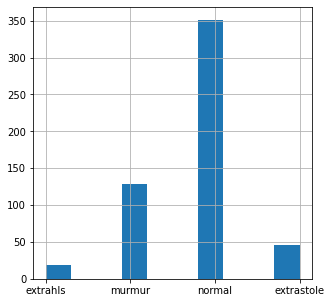

In [20]:
ABdf['label'].hist(figsize=(5, 5))

The data is very unbalanced, so we will upsample extrahls and extrastole and downsample normal

In [21]:
df_murmur = ABdf[ABdf.label == 'murmur']
df_extrastole = ABdf[ABdf.label == 'extrastole']
df_extrahls = ABdf[ABdf.label == 'extrahls']
df_normal = ABdf[ABdf.label == 'normal']
 
# Upsample minority classes
df_exhals_upsampled = resample(df_extrahls, replace=True, n_samples=129)    # to match murmur class
df_extrastole_upsampled = resample(df_extrastole, replace=True, n_samples=129)
# Downsample majority class
df_normal_downsampled = resample(df_normal, replace=False, n_samples=129)                               

# Combine classes
df_upsampled = pd.concat([df_murmur, df_exhals_upsampled])
df_upsampled = pd.concat([df_upsampled, df_extrastole_upsampled])
ABdf = pd.concat([df_upsampled, df_normal_downsampled])

ABdf.label.value_counts()

murmur        129
extrahls      129
extrastole    129
normal        129
Name: label, dtype: int64

<AxesSubplot:>

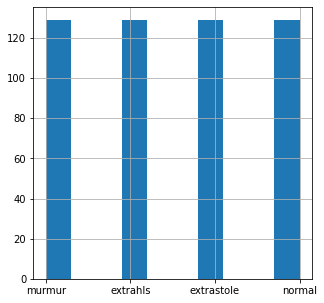

In [22]:
ABdf['label'].hist(figsize=(5, 5))

In [23]:
ABdf.head(-1)

,dataset,fname,label,sublabel
59,a,set_a/murmur__201101051104.wav,murmur,NaN
60,a,set_a/murmur__201101051108.wav,murmur,NaN
61,a,set_a/murmur__201101051114.wav,murmur,NaN
62,a,set_a/murmur__201101180902.wav,murmur,NaN
63,a,set_a/murmur__201102051443.wav,murmur,NaN
...,...,...,...,...
259,b,set_b/Btraining_normal_218_1308246311449_C1.wav,normal,NaN
261,b,set_b/Btraining_normal_220_1308250132896_D.wav,normal,NaN
236,b,set_b/Btraining_normal_201_1308144942432_A.wav,normal,NaN
223,b,set_b/Btraining_normal_183_1308072703477_C.wav,normal,NaN


In [24]:
ABdf = ABdf.reset_index()
print(ABdf.head(-1))

     index dataset                                            fname   label  \
0       59       a                   set_a/murmur__201101051104.wav  murmur   
1       60       a                   set_a/murmur__201101051108.wav  murmur   
2       61       a                   set_a/murmur__201101051114.wav  murmur   
3       62       a                   set_a/murmur__201101180902.wav  murmur   
4       63       a                   set_a/murmur__201102051443.wav  murmur   
..     ...     ...                                              ...     ...   
510    259       b  set_b/Btraining_normal_218_1308246311449_C1.wav  normal   
511    261       b   set_b/Btraining_normal_220_1308250132896_D.wav  normal   
512    236       b   set_b/Btraining_normal_201_1308144942432_A.wav  normal   
513    223       b   set_b/Btraining_normal_183_1308072703477_C.wav  normal   
514    146       b   set_b/Btraining_normal_137_1306764999211_D.wav  normal   

    sublabel  
0        NaN  
1        NaN  
2     

Looking at the audio signals of each class

In [25]:
dir = ROOT + '/'

In [26]:
# making a new dataframe with just the audio and its label
audioList = []
labels = []
for j in range(516):
  if('Btraining_extrastole' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_extrastole', 'extrastole_')
    #print(alteredPathName)
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_normal_Btraining_' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_normal_Btraining_', 'normal_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_normal' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_normal', 'normal_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_murmur_Btraining_' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_murmur_Btraining_', 'murmur_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_murmur' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_murmur', 'murmur_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  else:
    audioList.append(dir + str(ABdf["fname"][j]))
    labels.append(ABdf["label"][j])

In [27]:
print(audioList)
print(len(audioList))
print(len(labels))

['/kaggle/input/heartbeat-sounds/set_a/murmur__201101051104.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201101051108.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201101051114.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201101180902.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201102051443.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201102052338.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201103291548.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201104021355.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201104241315.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201104291843.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201106141148.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201108222221.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201108222223.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201108222224.wav', '/kaggle/input/heartbeat-sounds/set_a/murmur__201108222226.wav', '/kaggle/input/heartbeat

In [28]:
audioListSeries = pd.Series(audioList,name="Audio")
labelsSeries = pd.Series(labels,name="Label")
audioDF = pd.concat([audioListSeries,labelsSeries],axis=1)

In [29]:
audioDF['Label'].value_counts()

murmur        129
extrahls      129
extrastole    129
normal        129
Name: Label, dtype: int64

In [30]:
audioDF.head(-1)

,Audio,Label
0,/kaggle/input/heartbeat-sounds/set_a/murmur__2...,murmur
1,/kaggle/input/heartbeat-sounds/set_a/murmur__2...,murmur
2,/kaggle/input/heartbeat-sounds/set_a/murmur__2...,murmur
3,/kaggle/input/heartbeat-sounds/set_a/murmur__2...,murmur
4,/kaggle/input/heartbeat-sounds/set_a/murmur__2...,murmur
...,...,...
510,/kaggle/input/heartbeat-sounds/set_b/normal__2...,normal
511,/kaggle/input/heartbeat-sounds/set_b/normal__2...,normal
512,/kaggle/input/heartbeat-sounds/set_b/normal__2...,normal
513,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal


/kaggle/input/heartbeat-sounds/set_a/extrahls__201103182227.wav
129


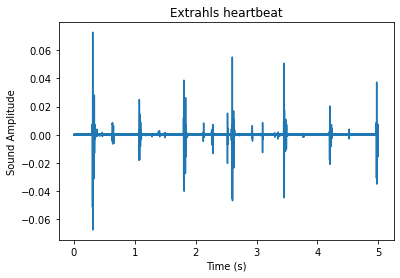

In [31]:
i = 0
while('extrahls' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i], duration=5)
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Extrahls heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)

In [32]:
dur=lr.get_duration(audio)
print ("duration:", dur)
print(audio.shape, audio_sfreq)

duration: 5.0
(110250,) 22050


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[-4.3862474e-05  8.4505627e-05  1.3877093e-04 ...  5.6488789e-03
  6.1442689e-03  7.1542142e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


/kaggle/input/heartbeat-sounds/set_a/murmur__201101051104.wav
0


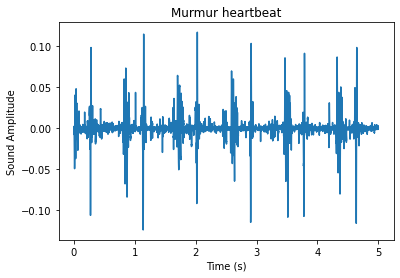

In [33]:
i = 0
while('murmur' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i], duration=5)
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Murmur heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)
#print(audio,audio_sfreq)

In [34]:
dur=lr.get_duration(audio)
print ("duration:", dur)
print(audio.shape, audio_sfreq)

duration: 5.0
(110250,) 22050


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[-0.00529056 -0.00752499 -0.00610133 ...  0.00093688  0.00056159
  0.00031823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


/kaggle/input/heartbeat-sounds/set_b/normal_noisynormal_271_1309369876160_C.wav
387


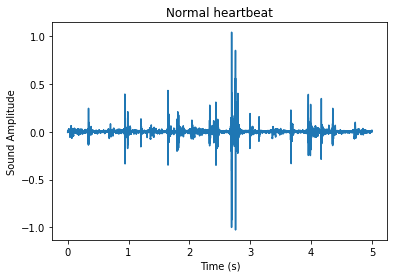

In [35]:
i = 0
while('normal' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i], duration=5)
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Normal heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)

In [36]:
dur=lr.get_duration(audio)
print ("duration:", dur)
print(audio.shape, audio_sfreq)

duration: 5.0
(110250,) 22050


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[-7.6404610e-03 -8.1271231e-03 -8.1920139e-03 ...  4.0253206e-05
  4.6381949e-05  1.7020293e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


/kaggle/input/heartbeat-sounds/set_b/extrastole__207_1308159792607_B1.wav
258


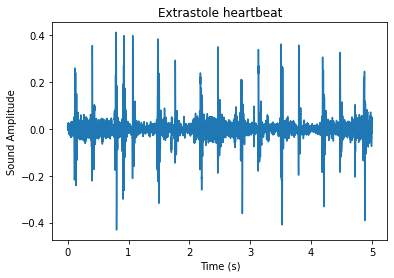

In [37]:
i = 0
while('extrastole' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i], duration=5)
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Extrastole heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)

In [38]:
# function to stretch the time of the signal
def stretch_function(data,rate=0.5):
    return lr.effects.time_stretch(data,rate)

In [39]:
word = ABdf['fname'][258].replace('Btraining_extrastole', 'extrastole_')
wav_type,sample_rate = lr.load(dir + word)
stretch_audio = stretch_function(wav_type)
Audio(stretch_audio,rate=sample_rate)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Pass rate=0.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


# **Data Splitting**

In [40]:
Xb = audioDF['Audio']
Yb = audioDF['Label']

In [41]:
print(Xb)

0      /kaggle/input/heartbeat-sounds/set_a/murmur__2...
1      /kaggle/input/heartbeat-sounds/set_a/murmur__2...
2      /kaggle/input/heartbeat-sounds/set_a/murmur__2...
3      /kaggle/input/heartbeat-sounds/set_a/murmur__2...
4      /kaggle/input/heartbeat-sounds/set_a/murmur__2...
                             ...                        
511    /kaggle/input/heartbeat-sounds/set_b/normal__2...
512    /kaggle/input/heartbeat-sounds/set_b/normal__2...
513    /kaggle/input/heartbeat-sounds/set_b/normal__1...
514    /kaggle/input/heartbeat-sounds/set_b/normal__1...
515    /kaggle/input/heartbeat-sounds/set_b/normal_no...
Name: Audio, Length: 516, dtype: object


In [42]:
print(Yb)

0      murmur
1      murmur
2      murmur
3      murmur
4      murmur
        ...  
511    normal
512    normal
513    normal
514    normal
515    normal
Name: Label, Length: 516, dtype: object


In [43]:
x_trainb, x_testb, y_trainb, y_testb = train_test_split(Xb, Yb, train_size=0.85, shuffle=True)
x_trainb, x_valb, y_trainb, y_valb = train_test_split(x_trainb, y_trainb, test_size=0.176, shuffle=True)

In [44]:
print("x test = " + str(x_testb.size))
print("y test = " + str(y_testb.size))
print("x train = " + str(x_trainb.size))
print("y train = " + str(y_trainb.size))
print("x val = " + str(x_valb.size))
print("y val = " + str(y_valb.size))

x test = 78
y test = 78
x train = 360
y train = 360
x val = 78
y val = 78


## Data preparation

In [45]:
MAX_SOUND_CLIP_DURATION = 12

In [46]:
def load_file_data (file_names, duration=12, sr=22050):
    input_length=sr*duration
    # function to load files and extract features
    data = []    
    for file_name in file_names:
        try:
            sound_file=file_name
            print ("load file ",sound_file)
            X, sr = lr.load( sound_file, sr=sr, duration=duration) 
            dur = lr.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio length :", file_name)
                y = lr.util.fix_length(X, input_length)                          
            # extract normalized mfcc feature from data
            mfccs = np.mean(lr.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file_name)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [47]:
FILES = x_trainb.values
x_trainb_pad = load_file_data(file_names=FILES, duration=MAX_SOUND_CLIP_DURATION)
FILES = x_valb.values
X_valb_pad = load_file_data(file_names=FILES, duration=MAX_SOUND_CLIP_DURATION)
FILES = x_testb.values
X_testb_pad = load_file_data(file_names=FILES, duration=MAX_SOUND_CLIP_DURATION)


load file  /kaggle/input/heartbeat-sounds/set_b/murmur__164_1307106095995_C.wav
fixing audio length : /kaggle/input/heartbeat-sounds/set_b/murmur__164_1307106095995_C.wav
load file  /kaggle/input/heartbeat-sounds/set_b/extrastole__249_1309202052376_C.wav


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Pass size=264600 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


fixing audio length : /kaggle/input/heartbeat-sounds/set_b/extrastole__249_1309202052376_C.wav
load file  /kaggle/input/heartbeat-sounds/set_a/extrahls__201104270458.wav
fixing audio length : /kaggle/input/heartbeat-sounds/set_a/extrahls__201104270458.wav
load file  /kaggle/input/heartbeat-sounds/set_b/normal_noisynormal_216_1308245839516_D.wav
load file  /kaggle/input/heartbeat-sounds/set_a/extrahls__201101160808.wav
fixing audio length : /kaggle/input/heartbeat-sounds/set_a/extrahls__201101160808.wav
load file  /kaggle/input/heartbeat-sounds/set_b/murmur_noisymurmur_171_1307971016233_F.wav
fixing audio length : /kaggle/input/heartbeat-sounds/set_b/murmur_noisymurmur_171_1307971016233_F.wav
load file  /kaggle/input/heartbeat-sounds/set_b/extrastole__261_1309353556003_C.wav
fixing audio length : /kaggle/input/heartbeat-sounds/set_b/extrastole__261_1309353556003_C.wav
load file  /kaggle/input/heartbeat-sounds/set_a/normal__201105021654.wav
fixing audio length : /kaggle/input/heartbeat-s

In [48]:
np.unique(Yb,return_counts=True)

(array(['extrahls', 'extrastole', 'murmur', 'normal'], dtype=object),
 array([129, 129, 129, 129]))

In [49]:
np.array(x_trainb_pad).shape,np.array(X_valb_pad).shape,np.array(X_testb_pad).shape

((360, 40, 1), (78, 40, 1), (78, 40, 1))

In [50]:
# labels
# Classes [murmur,normal,ehtrahs,extrasoles]


def encode(y):
    labels = {
        'murmur'     : np.array([1,0,0,0]),
        'normal'     : np.array([0,1,0,0]),
        'extrahls'   : np.array([0,0,1,0]),
        'extrastole' : np.array([0,0,0,1]),
    }
    y_new = np.zeros(y.shape + (4,))
    for i,label in enumerate(y):
        y_new[i] = labels[label]
    return y_new

In [51]:
y_trainb_encoded = encode(y_trainb)
y_valb_encoded = encode(y_valb)
y_testb_encoded = encode(y_testb)

In [52]:
np.array(y_trainb_encoded).shape,np.array(y_valb_encoded).shape,np.array(y_testb_encoded).shape

((360, 4), (78, 4), (78, 4))

## Model 


In [53]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers as tfl


In [54]:
from tensorflow.keras import optimizers

optimizer = optimizers.Adam(learning_rate=0.001)
loss_function = 'categorical_crossentropy'

In [119]:
checkpoint_filepath = '/kaggle/working/checkpoints/'

In [126]:
values = np.arange(0.000001,0.0003,0.00002)[::-1]
# values = np.array([0.00003,0.00005,0.00007,0.00009,0.0001,0.0003])[::-1]
boundaries = np.arange(10, 600,35)[:values.shape[0]-1]


scheduler = keras.optimizers.schedules.PiecewiseConstantDecay(
    list(boundaries), list(values))

lrscheduler = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=1)

In [127]:
model = keras.models.Sequential([
    tfl.Flatten(input_shape=(np.array(x_trainb_pad).shape[1],1,)),
    tfl.Dense(2048,activation='relu'),
    tfl.Dense(512,activation='relu'),

    tfl.Dense(4,activation='softmax')
],name='ClassifierA')
optimizer = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
model.summary()

Model: "ClassifierA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 40)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 2048)              83968     
_________________________________________________________________
dense_40 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 2052      
Total params: 1,135,108
Trainable params: 1,135,108
Non-trainable params: 0
_________________________________________________________________


In [128]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 50, mode='min')
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history=model.fit(
    x=np.array(x_trainb_pad),
    y=y_trainb_encoded,epochs=500,
    validation_data=(np.array(X_valb_pad),y_valb_encoded),
    callbacks=[lrscheduler,checkpoint,early_stopping]
)

Epoch 1/500

Epoch 00001: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 1s 28ms/step - loss: 14.5020 - accuracy: 0.3472 - val_loss: 5.6811 - val_accuracy: 0.5128
Epoch 2/500

Epoch 00002: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 12ms/step - loss: 6.8304 - accuracy: 0.4667 - val_loss: 2.0048 - val_accuracy: 0.6154
Epoch 3/500

Epoch 00003: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 12ms/step - loss: 3.0664 - accuracy: 0.5083 - val_loss: 1.7165 - val_accuracy: 0.6538
Epoch 4/500

Epoch 00004: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 13ms/step - loss: 2.0014 - accura

In [129]:
model.load_weights(checkpoint_filepath)

Text(0.5, 0, 'Epochs ')

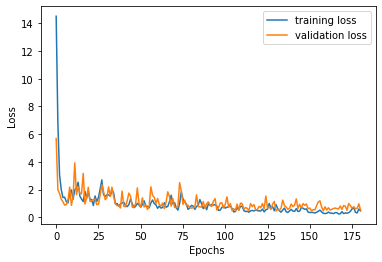

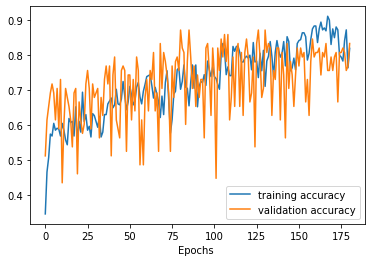

In [130]:
num=len(history.history['loss'])

plt.plot(range(num),history.history['loss'],label = 'training loss')
plt.plot(range(num),history.history['val_loss'],label = 'validation loss')

plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('Loss')

plt.figure()

plt.plot(range(num),history.history['accuracy'],label = 'training accuracy')
plt.plot(range(num),history.history['val_accuracy'],label = 'validation accuracy')

plt.legend()
plt.xlabel("Epochs ")

In [131]:
checkpoint_filepath = '/kaggle/working/checkpoints/'

model.load_weights(checkpoint_filepath)
model.evaluate(np.array(X_valb_pad),y_valb_encoded)

3/3 [==============================] - 0s 5ms/step - loss: 0.6616 - accuracy: 0.8718


[0.6616303324699402, 0.8717948794364929]

## Adding regularization

In [132]:
input_shape = np.array(x_trainb_pad).shape[1:]

In [133]:
model_reg = keras.models.Sequential([
    tfl.Flatten(input_shape=input_shape),
    tfl.Dense(2048,activation='relu'),
    tfl.Dense(512,activation='relu'),
    tfl.Dropout(0.2),
    tfl.Dense(4,activation='softmax')
],name='ClassifierA')

model_reg.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
model_reg.summary()

Model: "ClassifierA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 40)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 2048)              83968     
_________________________________________________________________
dense_43 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 4)                 2052      
Total params: 1,135,108
Trainable params: 1,135,108
Non-trainable params: 0
_________________________________________________________________


In [134]:
checkpoint_filepath = '/kaggle/working/checkpoints/model_reg/'
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history=model_reg.fit(
    x=np.array(x_trainb_pad),
    y=y_trainb_encoded,epochs=500,
    validation_data=(np.array(X_valb_pad),y_valb_encoded),
    callbacks=[lrscheduler,checkpoint,early_stopping]
)

Epoch 1/500

Epoch 00001: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 1s 26ms/step - loss: 34.4010 - accuracy: 0.3278 - val_loss: 4.2527 - val_accuracy: 0.5897
Epoch 2/500

Epoch 00002: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 10ms/step - loss: 7.0752 - accuracy: 0.4833 - val_loss: 1.9142 - val_accuracy: 0.5769
Epoch 3/500

Epoch 00003: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 10ms/step - loss: 3.7810 - accuracy: 0.5778 - val_loss: 4.0881 - val_accuracy: 0.5128
Epoch 4/500

Epoch 00004: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 11ms/step - loss: 3.2311 - accura

Text(0.5, 0, 'Epochs ')

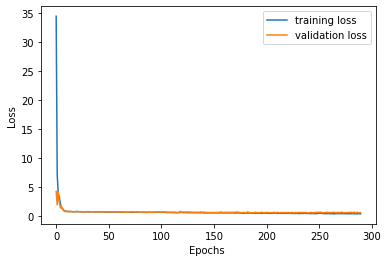

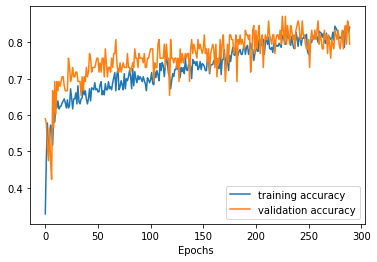

In [135]:
num=len(history.history['loss'])

plt.plot(range(num),history.history['loss'],label = 'training loss')
plt.plot(range(num),history.history['val_loss'],label = 'validation loss')

plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('Loss')

plt.figure()

plt.plot(range(num),history.history['accuracy'],label = 'training accuracy')
plt.plot(range(num),history.history['val_accuracy'],label = 'validation accuracy')

plt.legend()
plt.xlabel("Epochs ")

In [136]:
model_reg.evaluate(np.array(X_valb_pad),y_valb_encoded)

3/3 [==============================] - 0s 4ms/step - loss: 0.5999 - accuracy: 0.7949


[0.5998568534851074, 0.7948718070983887]

Model with regularization is much better (loss lower) so we discard the first result.

## Evaluation

## Accuracy

In [137]:
checkpoint_filepath = '/kaggle/working/checkpoints/'


In [138]:
model.load_weights(checkpoint_filepath)
model.evaluate(np.array(X_testb_pad),y_testb_encoded)

3/3 [==============================] - 0s 4ms/step - loss: 1.1177 - accuracy: 0.6410


[1.1177014112472534, 0.6410256624221802]

In [139]:
y_pred = model.predict(np.array(X_testb_pad))
y_pred_max = np.argsort(y_pred,axis=-1)[:,::-1][:,0]
y_true_max = np.argsort(y_testb_encoded,axis=-1)[:,::-1][:,0]

## F1 score

In [140]:
from sklearn.metrics import f1_score, classification_report

print(f1_score(y_true_max, y_pred_max, average='micro'))
target_names = [
    'murmur'    ,
    'normal'    ,
    'extrahls'  ,
    'extrastole',
]
print(classification_report(y_true_max, y_pred_max, target_names=target_names))

0.6410256410256411
              precision    recall  f1-score   support

      murmur       0.91      0.42      0.57        24
      normal       0.46      0.55      0.50        20
    extrahls       0.84      1.00      0.91        16
  extrastole       0.54      0.72      0.62        18

    accuracy                           0.64        78
   macro avg       0.69      0.67      0.65        78
weighted avg       0.69      0.64      0.63        78



## AUC

In [141]:
m = tf.keras.metrics.AUC(num_thresholds=80)
m.update_state(y_testb_encoded, y_pred)

m.result().numpy()


0.88173896

## Confusion Matrix

<AxesSubplot:>

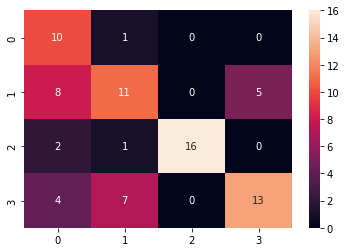

In [142]:
import seaborn as sns

conf = tf.math.confusion_matrix(y_pred_max,y_true_max)

sns.heatmap(conf,annot=True)

# Model : CNN

In [143]:
model_cnn = keras.models.Sequential([
#     tfl.Flatten(input_shape=(40,1)),
    tfl.Conv1D(64,3,activation='relu',padding='same',input_shape=(40,1)),
    tfl.Conv1D(64,3,activation='relu',padding='same'),
    tfl.MaxPool1D(2,2),
    tfl.Conv1D(32,3,activation='relu',padding='same'),
    tfl.Conv1D(32,3,activation='relu',padding='same'),
    tfl.MaxPool1D(2,2),
    tfl.Flatten(),
    tfl.Dense(64,activation='relu'),
    tfl.Dense(4,activation='softmax'),

])

model_cnn.compile(optimizer=optimizer,loss=loss_function,metrics=['accuracy'])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 64)            256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40, 64)            12352     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 20, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 20, 32)            6176      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 20, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 320)               0

In [144]:
checkpoint_filepath_cnn = '/kaggle/working/checkpoints/cnn'
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 50, mode='min')

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_cnn,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history=model_cnn.fit(
    x=np.array(x_trainb_pad),
    y=y_trainb_encoded,epochs=500,
    validation_data=(np.array(X_valb_pad),y_valb_encoded),
    callbacks=[lrscheduler,checkpoint,early_stopping]
)

Epoch 1/500

Epoch 00001: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 1s 36ms/step - loss: 1.5633 - accuracy: 0.4028 - val_loss: 1.3403 - val_accuracy: 0.5128
Epoch 2/500

Epoch 00002: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 12ms/step - loss: 1.2060 - accuracy: 0.4778 - val_loss: 0.9331 - val_accuracy: 0.5256
Epoch 3/500

Epoch 00003: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 12ms/step - loss: 0.9421 - accuracy: 0.5528 - val_loss: 0.7821 - val_accuracy: 0.6538
Epoch 4/500

Epoch 00004: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 12ms/step - loss: 0.8157 - accurac

Text(0.5, 0, 'Epochs ')

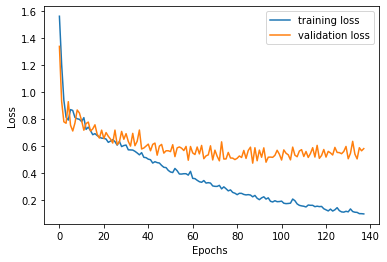

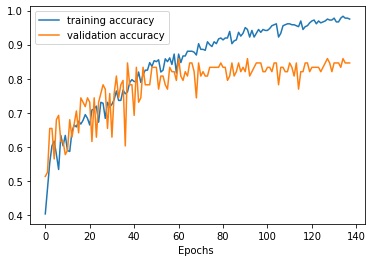

In [145]:
num=len(history.history['loss'])

plt.plot(range(num),history.history['loss'],label = 'training loss')
plt.plot(range(num),history.history['val_loss'],label = 'validation loss')

plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('Loss')

plt.figure()

plt.plot(range(num),history.history['accuracy'],label = 'training accuracy')
plt.plot(range(num),history.history['val_accuracy'],label = 'validation accuracy')

plt.legend()
plt.xlabel("Epochs ")

In [146]:
model_cnn.evaluate(np.array(X_valb_pad),y_valb_encoded)

3/3 [==============================] - 0s 27ms/step - loss: 0.5836 - accuracy: 0.8462


[0.5836395621299744, 0.8461538553237915]

We add batch normalization and dropout.

In [147]:
model_cnn_reg = keras.models.Sequential([
    tfl.Conv1D(64,3,activation='relu',padding='same',input_shape=input_shape),
    tfl.Conv1D(64,3,activation='relu',padding='same'),
    tfl.MaxPool1D(2,2),
    tfl.BatchNormalization(),
    tfl.Conv1D(32,3,activation='relu',padding='same'),
    tfl.Conv1D(32,3,activation='relu',padding='same'),
    tfl.MaxPool1D(2,2),
    tfl.BatchNormalization(),
    tfl.Flatten(),
    tfl.Dropout(0.2),
    tfl.Dense(64,activation='relu'),
    tfl.Dropout(0.2),
    tfl.Dense(4,activation='softmax'),

])

model_cnn_reg.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
model_cnn_reg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 40, 64)            256       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 40, 64)            12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 20, 64)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 64)            256       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 20, 32)            6176      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 20, 32)            3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 32)           

In [148]:
checkpoint_filepath_cnn = '/kaggle/working/checkpoints/cnn_reg'
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 50, mode='min')

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history=model_cnn_reg.fit(
    x=np.array(x_trainb_pad),
    y=y_trainb_encoded,epochs=500,
    validation_data=(np.array(X_valb_pad),y_valb_encoded),
    callbacks=[lrscheduler,checkpoint]
)

Epoch 1/500

Epoch 00001: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 2s 42ms/step - loss: 1.3125 - accuracy: 0.4333 - val_loss: 1.3651 - val_accuracy: 0.4103
Epoch 2/500

Epoch 00002: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 13ms/step - loss: 1.0114 - accuracy: 0.5500 - val_loss: 1.0988 - val_accuracy: 0.4359
Epoch 3/500

Epoch 00003: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 13ms/step - loss: 0.9121 - accuracy: 0.5944 - val_loss: 0.9949 - val_accuracy: 0.5128
Epoch 4/500

Epoch 00004: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 13ms/step - loss: 0.8731 - accurac

Text(0.5, 0, 'Epochs ')

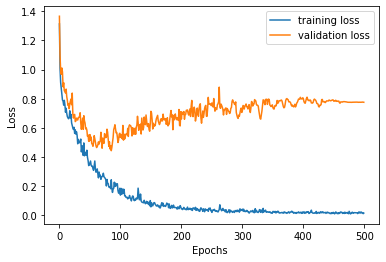

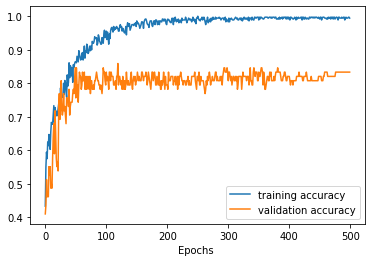

In [149]:
num=len(history.history['loss'])

plt.plot(range(num),history.history['loss'],label = 'training loss')
plt.plot(range(num),history.history['val_loss'],label = 'validation loss')

plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('Loss')

plt.figure()

plt.plot(range(num),history.history['accuracy'],label = 'training accuracy')
plt.plot(range(num),history.history['val_accuracy'],label = 'validation accuracy')

plt.legend()
plt.xlabel("Epochs ")

In [150]:
model_cnn_reg.evaluate(np.array(X_valb_pad),y_valb_encoded)

3/3 [==============================] - 0s 7ms/step - loss: 0.7757 - accuracy: 0.8333


[0.7756972908973694, 0.8333333134651184]

first model is better

In [151]:
model_cnn.load_weights('/kaggle/working/checkpoints/cnn')
model_cnn.evaluate(np.array(X_valb_pad),y_valb_encoded)

3/3 [==============================] - 0s 5ms/step - loss: 0.5518 - accuracy: 0.8590


[0.5517873764038086, 0.8589743375778198]

# Evaluate

In [152]:
model_cnn.evaluate(np.array(X_testb_pad),y_testb_encoded)

3/3 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.6538


[0.691851794719696, 0.6538461446762085]

In [153]:
y_pred = model_cnn.predict(np.array(X_testb_pad))
y_pred_max = np.argsort(y_pred,axis=-1)[:,::-1][:,0]
y_true_max = np.argsort(y_testb_encoded,axis=-1)[:,::-1][:,0]


In [154]:
from sklearn.metrics import f1_score, classification_report

f1_score(y_true_max, y_pred_max, average='micro')

print(classification_report(y_true_max, y_pred_max, target_names=target_names))

              precision    recall  f1-score   support

      murmur       0.70      0.67      0.68        24
      normal       0.41      0.35      0.38        20
    extrahls       0.89      1.00      0.94        16
  extrastole       0.60      0.67      0.63        18

    accuracy                           0.65        78
   macro avg       0.65      0.67      0.66        78
weighted avg       0.64      0.65      0.65        78



In [155]:
m = tf.keras.metrics.AUC(num_thresholds=80)
m.update_state(y_testb_encoded, y_pred)

m.result().numpy()

0.9112152

<AxesSubplot:>

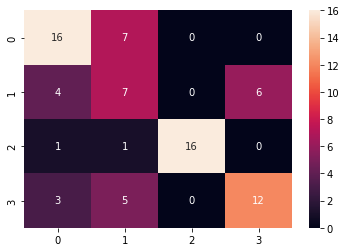

In [156]:
import seaborn as sns

conf = tf.math.confusion_matrix(y_pred_max,y_true_max)

sns.heatmap(conf,annot=True)

Going deeper with feed forward

In [157]:
model_deep = keras.models.Sequential([
    tfl.Flatten(input_shape=input_shape),
    tfl.Dense(2048,activation='relu'),
    tfl.Dense(1024,activation='relu'),
    tfl.Dense(64,activation='relu'),

    tfl.Dense(64,activation='relu'),


    tfl.Dense(4,activation='softmax')
],name='ClassifierA')
optimizer = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model_deep.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
model_deep.summary()

Model: "ClassifierA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 40)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 2048)              83968     
_________________________________________________________________
dense_50 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_51 (Dense)             (None, 64)                65600     
_________________________________________________________________
dense_52 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 260       
Total params: 2,252,164
Trainable params: 2,252,164
Non-trainable params: 0
_____________________________________________

In [158]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 50, mode='min')
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/checkpoints/model_deep',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history=model_deep.fit(
    x=np.array(x_trainb_pad),
    y=y_trainb_encoded,epochs=500,
    validation_data=(np.array(X_valb_pad),y_valb_encoded),
    callbacks=[lrscheduler,checkpoint,early_stopping]
)

Epoch 1/500

Epoch 00001: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 1s 38ms/step - loss: 4.8981 - accuracy: 0.3250 - val_loss: 2.2410 - val_accuracy: 0.3590
Epoch 2/500

Epoch 00002: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 17ms/step - loss: 1.6037 - accuracy: 0.4194 - val_loss: 1.3470 - val_accuracy: 0.5641
Epoch 3/500

Epoch 00003: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 18ms/step - loss: 1.2104 - accuracy: 0.5444 - val_loss: 0.9378 - val_accuracy: 0.6410
Epoch 4/500

Epoch 00004: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 17ms/step - loss: 1.0305 - accurac

Text(0, 0.5, 'accuracy')

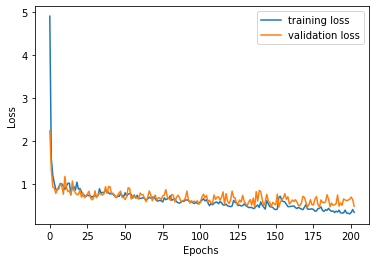

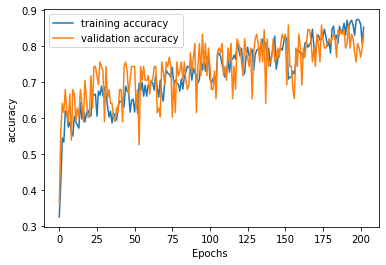

In [159]:
num=len(history.history['loss'])

plt.plot(range(num),history.history['loss'],label = 'training loss')
plt.plot(range(num),history.history['val_loss'],label = 'validation loss')

plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('Loss')

plt.figure()

plt.plot(range(num),history.history['accuracy'],label = 'training accuracy')
plt.plot(range(num),history.history['val_accuracy'],label = 'validation accuracy')

plt.legend()
plt.xlabel("Epochs ")
plt.ylabel('accuracy')

In [160]:
model_deep.evaluate(np.array(X_valb_pad),y_valb_encoded)

3/3 [==============================] - 0s 8ms/step - loss: 0.4959 - accuracy: 0.8333


[0.4959195852279663, 0.8333333134651184]

In [161]:
model_deep.evaluate(np.array(X_testb_pad),y_testb_encoded)

3/3 [==============================] - 0s 6ms/step - loss: 0.7822 - accuracy: 0.6667


[0.782166063785553, 0.6666666865348816]

In [162]:
y_pred = model_deep.predict(np.array(X_testb_pad))
y_pred_max = np.argsort(y_pred,axis=-1)[:,::-1][:,0]
y_true_max = np.argsort(y_testb_encoded,axis=-1)[:,::-1][:,0]


In [163]:
from sklearn.metrics import classification_report

print(classification_report(y_true_max, y_pred_max, target_names=target_names))

              precision    recall  f1-score   support

      murmur       0.82      0.38      0.51        24
      normal       0.48      0.60      0.53        20
    extrahls       0.94      0.94      0.94        16
  extrastole       0.62      0.89      0.73        18

    accuracy                           0.67        78
   macro avg       0.71      0.70      0.68        78
weighted avg       0.71      0.67      0.66        78



In [164]:
m = tf.keras.metrics.AUC(num_thresholds=80)
m.update_state(y_testb_encoded, y_pred)

m.result().numpy()

0.9020656

<AxesSubplot:>

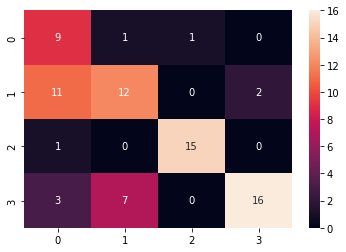

In [165]:
import seaborn as sns

conf = tf.math.confusion_matrix(y_pred_max,y_true_max)

sns.heatmap(conf,annot=True)

Going deepe 1D CNN

In [166]:
model_cnn_deep = keras.models.Sequential([
#     tfl.Flatten(input_shape=(40,1)),
    tfl.Conv1D(64,3,activation='relu',padding='same',input_shape=(40,1)),
    tfl.Conv1D(64,3,activation='relu',padding='same'),
    tfl.MaxPool1D(2,2),
    tfl.Conv1D(32,3,activation='relu',padding='same'),
    tfl.Conv1D(32,3,activation='relu',padding='same'),
    tfl.MaxPool1D(2,2),
    tfl.Conv1D(16,3,activation='relu',padding='same'),
    tfl.Conv1D(16,3,activation='relu',padding='same'),
    tfl.MaxPool1D(2,2),
    tfl.Flatten(),

    tfl.Dense(64,activation='relu'),
    tfl.Dense(64,activation='relu'),

    tfl.Dense(4,activation='softmax'),

])

model_cnn_deep.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
model_cnn_deep.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 40, 64)            256       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 40, 64)            12352     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 20, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 20, 32)            6176      
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 20, 32)            3104      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 10, 16)           

In [167]:
checkpoint_filepath_cnn = '/kaggle/working/checkpoints/cnn_deep'
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 50, mode='min')

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history=model_cnn_deep.fit(
    x=np.array(x_trainb_pad),
    y=y_trainb_encoded,epochs=500,
    validation_data=(np.array(X_valb_pad),y_valb_encoded),
    callbacks=[lrscheduler,checkpoint,early_stopping]
)

Epoch 1/500

Epoch 00001: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 2s 44ms/step - loss: 1.3022 - accuracy: 0.3833 - val_loss: 0.9316 - val_accuracy: 0.5897
Epoch 2/500

Epoch 00002: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 14ms/step - loss: 0.9491 - accuracy: 0.5694 - val_loss: 0.8289 - val_accuracy: 0.6410
Epoch 3/500

Epoch 00003: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 14ms/step - loss: 0.9058 - accuracy: 0.5306 - val_loss: 0.8403 - val_accuracy: 0.6923
Epoch 4/500

Epoch 00004: LearningRateScheduler setting learning rate to tf.Tensor(0.00028100000000000005, shape=(), dtype=float64).
12/12 [==============================] - 0s 15ms/step - loss: 0.8827 - accurac

Text(0, 0.5, 'accuracy')

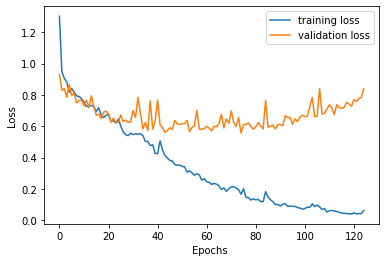

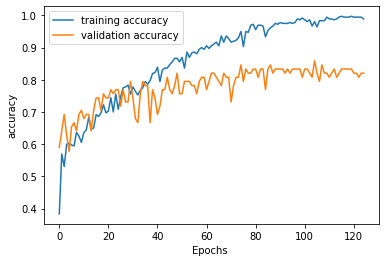

In [168]:
num=len(history.history['loss'])

plt.plot(range(num),history.history['loss'],label = 'training loss')
plt.plot(range(num),history.history['val_loss'],label = 'validation loss')

plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('Loss')

plt.figure()

plt.plot(range(num),history.history['accuracy'],label = 'training accuracy')
plt.plot(range(num),history.history['val_accuracy'],label = 'validation accuracy')

plt.legend()
plt.xlabel("Epochs ")
plt.ylabel('accuracy')

In [169]:
model_cnn_deep.evaluate(np.array(X_valb_pad),y_valb_encoded)

3/3 [==============================] - 0s 6ms/step - loss: 0.8390 - accuracy: 0.8205


[0.8389767408370972, 0.8205128312110901]

In [170]:
model_cnn_deep.evaluate(np.array(X_testb_pad),y_testb_encoded)

3/3 [==============================] - 0s 5ms/step - loss: 0.8406 - accuracy: 0.7564


[0.8406252861022949, 0.7564102411270142]

In [171]:
y_pred = model_cnn_deep.predict(np.array(X_testb_pad))
y_pred_max = np.argsort(y_pred,axis=-1)[:,::-1][:,0]
y_true_max = np.argsort(y_testb_encoded,axis=-1)[:,::-1][:,0]

In [172]:
print(classification_report(y_true_max, y_pred_max, target_names=target_names))

              precision    recall  f1-score   support

      murmur       0.80      0.67      0.73        24
      normal       0.60      0.60      0.60        20
    extrahls       0.94      1.00      0.97        16
  extrastole       0.71      0.83      0.77        18

    accuracy                           0.76        78
   macro avg       0.76      0.78      0.77        78
weighted avg       0.76      0.76      0.75        78



In [173]:
m = tf.keras.metrics.AUC(num_thresholds=80)
m.update_state(y_testb_encoded, y_pred)

m.result().numpy()

0.93548656

<AxesSubplot:>

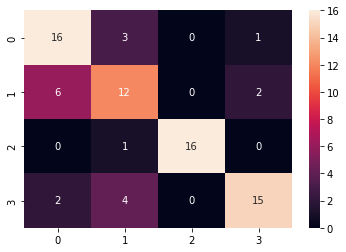

In [174]:
conf = tf.math.confusion_matrix(y_pred_max,y_true_max)

sns.heatmap(conf,annot=True)